In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from skimage import io

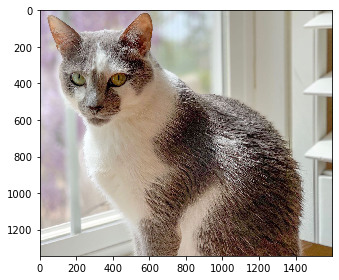

In [15]:
img = io.imread('cat.jpg')
io.imshow(img)

In [16]:
img.shape

(1344, 1600, 3)

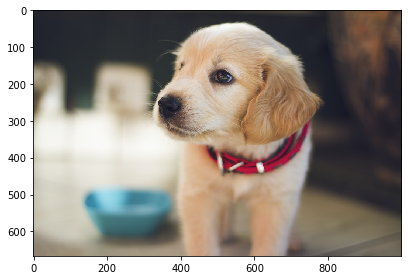

In [48]:
dog = io.imread('dog.jfif')
io.imshow(dog)

In [49]:
dog.resize((1,)+dog.shape)

In [17]:
img.resize((1,)+img.shape)

In [21]:
img.shape

(1, 1344, 1600, 3)

In [50]:
datagen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.3,
            height_shift_range=0.3,
            brightness_range=(0.2, 0.5),
            shear_range=0.5,
            zoom_range=0.2,            
            fill_mode='nearest',
            horizontal_flip=True,
            cval = 127,
            rescale=0.1
        )

In [47]:
i = 0
for _ in datagen.flow(img,save_to_dir='cats_augmented2',save_prefix='cat_aug',save_format='jpg'):
    i += 1
    if i==3:
        break

In [51]:
i = 0
for _ in datagen.flow(dog,save_to_dir='dog',save_prefix='dog_aug',save_format='jpg'):
    i += 1
    if i==100:
        break

In [25]:
import os

In [28]:
images = []
for file in os.listdir('cats_augmented'):
    if '.jpg' in file:
        print(file)
        images.append(io.imread('cats_augmented/'+file))

cat_aug_0_1050.jpg
cat_aug_0_2506.jpg
cat_aug_0_4483.jpg
cat_aug_0_6211.jpg
cat_aug_0_9286.jpg
cat_aug_0_9960.jpg


In [31]:
import matplotlib.pyplot as plt

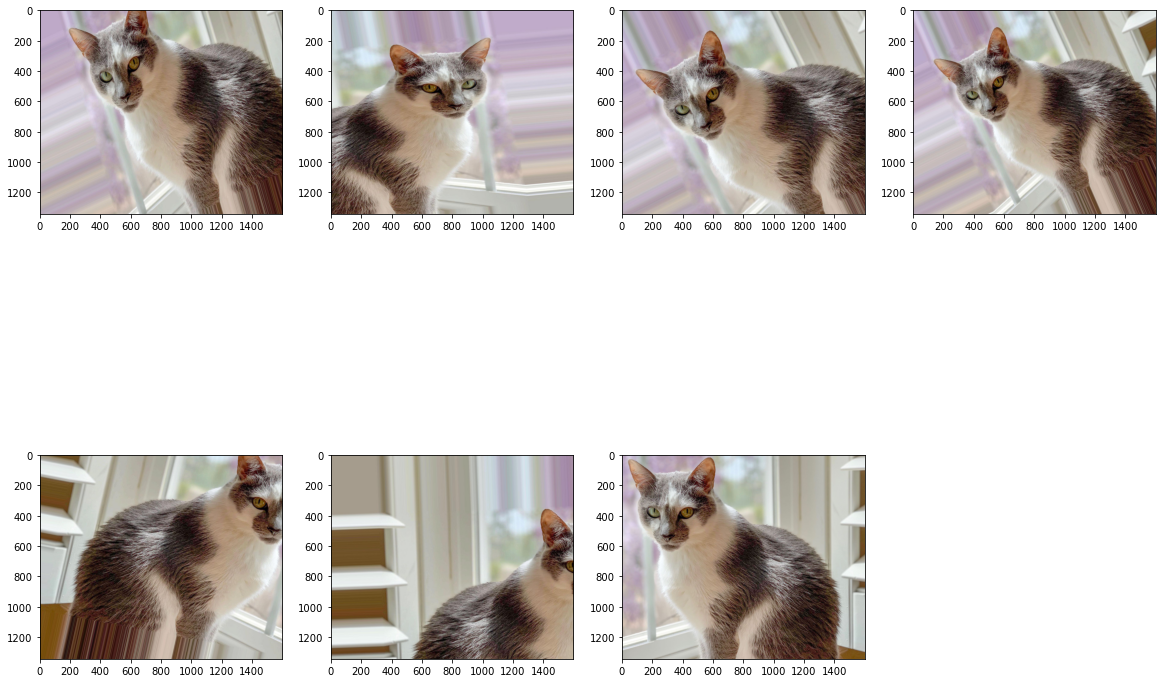

In [38]:
plt.figure(figsize=(20,15))
for ind, image in enumerate(images):
    plt.subplot(2,4,ind+1)
    plt.imshow(image)
plt.subplot(2,4,7)
plt.imshow(img[0,:,:,:])

In [55]:
dog.shape

(1, 667, 1000, 3)

## Preparing the CNN Model

In [52]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

In [63]:
num_classes = 1

In [64]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same',activation='relu', input_shape=(128,128,3)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

In [65]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               67109376  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [66]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
train_data_gen = ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.3,
            height_shift_range=0.3,
            brightness_range=(0.2, 0.5),
            shear_range=0.5,
            zoom_range=0.2,            
            fill_mode='nearest',
            horizontal_flip=True,
            cval = 127,
            rescale=0.1
        )
valid_data_gen = ImageDataGenerator(rescale=0.1)


In [68]:
train_data = train_data_gen.flow_from_directory('training_data',target_size=(128,128),batch_size=8,class_mode='binary')
valid_data = valid_data_gen.flow_from_directory('test_data',target_size=(128,128),batch_size=8,class_mode='binary')

Found 140 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [69]:
model.fit(train_data,validation_data=valid_data,epochs=2)

Epoch 1/2
18/18 [==============================] - 62s 2s/step - loss: 65.5897 - accuracy: 0.5699 - val_loss: 0.6181 - val_accuracy: 0.5000
Epoch 2/2
18/18 [==============================] - 32s 2s/step - loss: 0.6239 - accuracy: 0.4582 - val_loss: 0.4867 - val_accuracy: 0.5000
